<a href="https://colab.research.google.com/github/NoamTene/Udemy/blob/master/Udemy7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy  as np
import plotly.express  as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import math

from matplotlib import cm
plt.style.use('ggplot')

The following raw github is a frozen version of https://www.kaggle.com/andrewmvd/udemy-courses/download.  We believe that this file is just a small sample of all Udemy offerings but have chosen to use it as a snapshot of older course stats so we can compare them with more recent values and see if and how they changed.

In [2]:
df1 = pd.read_csv('https://raw.githubusercontent.com/NoamTene/Udemy/master/datasets_646598_1162286_udemy_courses.csv')
print(df1.shape)
df1.count()

(3678, 12)


course_id              3678
course_title           3678
url                    3678
is_paid                3678
price                  3678
num_subscribers        3678
num_reviews            3678
num_lectures           3678
level                  3678
content_duration       3678
published_timestamp    3678
subject                3678
dtype: int64

In [3]:
df1.drop_duplicates(inplace=True)
print(df1.shape)
df1.count()

(3672, 12)


course_id              3672
course_title           3672
url                    3672
is_paid                3672
price                  3672
num_subscribers        3672
num_reviews            3672
num_lectures           3672
level                  3672
content_duration       3672
published_timestamp    3672
subject                3672
dtype: int64

The following file was generated by David Margulis for a Class project presumably using the code in UdemyDavid_MakeNewSnapshot_TRY.ipynb within this github repository.  David has edited the text manually before passing it on to this frozen version.

In [4]:
df2= pd.read_csv('https://raw.githubusercontent.com/NoamTene/Udemy/master/Rates_9July_new.csv')
print(df2.shape)
df2.count()

(3678, 15)


CourseID       3678
ReadStat       3678
Rate1          2670
Rate2          2670
Rate3          2670
Rate4          2670
Rate5          2670
Sum            2670
NewEnrolled    2724
UpdateDate     3668
Upd_monthes    2424
Orig_Price     2599
Curr_Price     2599
Discount       2599
Time           3668
dtype: int64

In [5]:
df2.drop_duplicates(subset='CourseID',inplace=True)
df2.count()

CourseID       3672
ReadStat       3672
Rate1          2666
Rate2          2666
Rate3          2666
Rate4          2666
Rate5          2666
Sum            2666
NewEnrolled    2720
UpdateDate     3662
Upd_monthes    2420
Orig_Price     2595
Curr_Price     2595
Discount       2595
Time           3662
dtype: int64

In [6]:
df1.sample(5)

course_id  ...              subject
1466     197610  ...       Graphic Design
2846     942366  ...      Web Development
179     1188742  ...     Business Finance
1467     672112  ...       Graphic Design
1960     812914  ...  Musical Instruments

[5 rows x 12 columns]

In [7]:
df2.sample(5)

CourseID ReadStat  Rate1  ...  Curr_Price  Discount                   Time
2093    269832       OK    0.0  ...       47.99      40.0   2020-07-09 15:26:10 
3276    130694       OK    2.0  ...       47.99      40.0   2020-07-09 16:38:33 
1880    893056       OK    0.0  ...       71.99      40.0   2020-07-09 14:54:11 
1849    648628       OK    1.0  ...      467.99      40.0   2020-07-09 14:52:27 
1194    931588       OK    3.0  ...       47.99      40.0   2020-07-09 14:24:04 

[5 rows x 15 columns]

# Sanity check: Verify that Sum is redundant.

In [8]:
df2[(df2.Rate1+df2.Rate2+df2.Rate3+df2.Rate4+df2.Rate5!=df2.Sum)  & (df2.Sum==df2.Sum)] 

Empty DataFrame
Columns: [CourseID, ReadStat, Rate1, Rate2, Rate3, Rate4, Rate5, Sum, NewEnrolled, UpdateDate, Upd_monthes, Orig_Price, Curr_Price, Discount, Time]
Index: []

Sanity check: Verify that df1.is_paid is redundant

In [9]:
df1[(df1.is_paid)^(df1.price!=0)] 

Empty DataFrame
Columns: [course_id, course_title, url, is_paid, price, num_subscribers, num_reviews, num_lectures, level, content_duration, published_timestamp, subject]
Index: []

In [10]:
df2.columns=['course_id','status','rating1','rating2','rating3','rating4','rating5','rating_tot','new_subscribers','new_pub_date','upd_month','new_price','curr_price','discount','timestamp']
df1.columns=['course_id','title','url','is_paid','old_price','old_subscribers','num_reviews','num_lectures','level','duration','old_pub_date','subject']

In [11]:
df = df1.join(df2.set_index('course_id'),on='course_id')

A naive first attempt to plot a histogram of the number of subscribers does not give much information:

In [12]:
print(df1.shape)
print(df2.shape)
print(df.shape)

(3672, 12)
(3672, 15)
(3672, 26)


In [13]:
df.columns

Index(['course_id', 'title', 'url', 'is_paid', 'old_price', 'old_subscribers',
       'num_reviews', 'num_lectures', 'level', 'duration', 'old_pub_date',
       'subject', 'status', 'rating1', 'rating2', 'rating3', 'rating4',
       'rating5', 'rating_tot', 'new_subscribers', 'new_pub_date', 'upd_month',
       'new_price', 'curr_price', 'discount', 'timestamp'],
      dtype='object')

In [14]:
df.count()

course_id          3672
title              3672
url                3672
is_paid            3672
old_price          3672
old_subscribers    3672
num_reviews        3672
num_lectures       3672
level              3672
duration           3672
old_pub_date       3672
subject            3672
status             3672
rating1            2666
rating2            2666
rating3            2666
rating4            2666
rating5            2666
rating_tot         2666
new_subscribers    2720
new_pub_date       3662
upd_month          2420
new_price          2595
curr_price         2595
discount           2595
timestamp          3662
dtype: int64

In [48]:
df['old_revenue']  = df.old_price*df.old_subscribers
df['new_revenue']  = df.new_price*df.new_subscribers
df['hours_watched'] = df.num_lectures*df.old_subscribers
df['price_per_lecture']   = df.old_price/df.num_lectures

In [49]:
df.sample(5)

course_id  ... price_per_lecture
782     1221942  ...          2.916667
2166     324226  ...          0.500000
1271     656914  ...          1.333333
2388    1195742  ...          1.104651
3266     228934  ...          5.937500

[5 rows x 30 columns]

In [17]:
dfc = df[(~np.isnan(df.new_subscribers)) & ~np.isnan(df.new_price)]
dfc.shape

(2592, 30)

In [18]:
new_subsTot = dfc.new_subscribers.sum()
print(new_subsTot)
old_subsTot = dfc.old_subscribers.sum()
print(old_subsTot)


24702258.0
9777804


In [19]:
dfc['new_perc_subs']  = df.new_subscribers/new_subsTot
dfc['old_perc_subs']  = df.old_subscribers/old_subsTot


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
dfc.sort_values('old_subscribers',inplace=True)
#dfc['cum_new_subsc']=np.cumsum(dfc.new_subscribers.sort_values()).reset_index(drop=True)/new_subsTot
dfc['cum_old_subsc']=np.cumsum(dfc.old_subscribers)/old_subsTot
dfc[1700:1705]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



course_id  ... cum_old_subsc
1366     424770  ...      0.099939
3639     261148  ...      0.100126
2632     945336  ...      0.100314
3559     882128  ...      0.100502
1916     132570  ...      0.100691

[5 rows x 33 columns]

In [21]:
dfc.sort_values('new_subscribers',inplace=True)
dfc['cum_new_subsc']=np.cumsum(dfc.new_subscribers)/new_subsTot
dfc[1853:1858]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



course_id  ... cum_new_subsc
2279    1244302  ...      0.099647
952      793084  ...      0.099859
346     1034074  ...      0.100070
3124     982860  ...      0.100282
2900     896858  ...      0.100494

[5 rows x 34 columns]

In [22]:
new_bestseller_thr = 90000
old_bestseller_thr = 40000
low_thr_cum_perc = 0.1
def calc_cat(num,cum,best_thr,low_thr):
   return np.where(num>best_thr, 3, np.where(cum>low_thr,2,1))

In [23]:
dfc['new_cat'] = calc_cat(dfc['new_subscribers'], dfc['cum_new_subsc'], new_bestseller_thr, low_thr_cum_perc)
dfc['old_cat'] = calc_cat(dfc['old_subscribers'], dfc['cum_old_subsc'], old_bestseller_thr, low_thr_cum_perc)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
dfc[1853:1858]

course_id  ... old_cat
2279    1244302  ...       1
952      793084  ...       2
346     1034074  ...       2
3124     982860  ...       2
2900     896858  ...       1

[5 rows x 36 columns]

In [25]:
dfc.to_csv('UdemyA.csv')

In [26]:
pd.crosstab(dfc['old_cat'], dfc['new_cat'])

new_cat     1    2   3
old_cat               
1        1580  120   1
2         275  563  17
3           0   10  26

In [27]:
pd.crosstab([dfc['subject'],dfc['old_cat']], dfc['new_cat'])

new_cat                        1    2   3
subject             old_cat              
Business Finance    1        515   33   0
                    2         61   92   4
                    3          0    1   2
Graphic Design      1        278   22   1
                    2         39   53   2
                    3          0    0   3
Musical Instruments 1        439   14   0
                    2         23   34   1
                    3          0    0   2
Web Development     1        348   51   0
                    2        152  384  10
                    3          0    9  19

In [28]:
dfc[(dfc.old_cat==2) & (dfc.new_cat==3)]

course_id  ... old_cat
2550     787236  ...       2
119      151668  ...       2
2565    1042110  ...       2
2536     917724  ...       2
3513     311538  ...       2
3238     772618  ...       2
1212    1046722  ...       2
3184     949282  ...       2
38       321410  ...       2
3200     822444  ...       2
3224     995016  ...       2
37       888716  ...       2
2486     965528  ...       2
1982      42271  ...       2
40       648826  ...       2
3226     851712  ...       2
1211     874012  ...       2

[17 rows x 36 columns]

In [29]:
dfc[dfc.old_subscribers>40000].count()

course_id            36
title                36
url                  36
is_paid              36
old_price            36
old_subscribers      36
num_reviews          36
num_lectures         36
level                36
duration             36
old_pub_date         36
subject              36
status               36
rating1              21
rating2              21
rating3              21
rating4              21
rating5              21
rating_tot           21
new_subscribers      36
new_pub_date         36
upd_month            21
new_price            36
curr_price           36
discount             36
timestamp            36
old_revenue          36
new_revenue          36
hours_watched        36
price_per_lecture    36
new_perc_subs        36
old_perc_subs        36
cum_old_subsc        36
cum_new_subsc        36
new_cat              36
old_cat              36
dtype: int64

(array([2.438e+03, 1.000e+02, 1.900e+01, 1.200e+01, 9.000e+00, 7.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([     0.  ,  13446.15,  26892.3 ,  40338.45,  53784.6 ,  67230.75,
         80676.9 ,  94123.05, 107569.2 , 121015.35, 134461.5 , 147907.65,
        161353.8 , 174799.95, 188246.1 , 201692.25, 215138.4 , 228584.55,
        242030.7 , 255476.85, 268923.  ]),
 <a list of 20 Patch objects>)

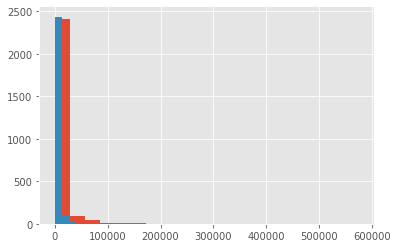

In [30]:
plt.hist(dfc.new_subscribers,bins=20);
plt.hist(dfc.old_subscribers,bins=20)

The first naive attempt does tells us a few things that are helpful in generating a more meaningful plot:

1. Most of the courses are in the lowest bin with much less than 50,000 subscribers
2. There must be a few courses with more than 250,000 subscribers listed even though we can not see them on this scale.  Otherwise the x-axis would not extend that far.
3. A log plot may at least make it possible to see these few outliers.
4. Using more histogram bins may help see the details

sum(new_subscribers)= 24702258.0
sum(old_subscribers)= 9777804


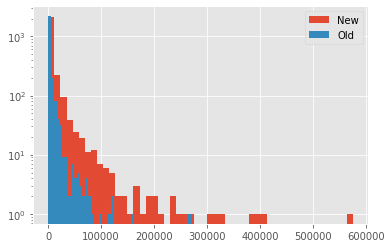

In [31]:
print("sum(new_subscribers)=",dfc.new_subscribers.sum())
print("sum(old_subscribers)=",dfc.old_subscribers.sum())
plt.yscale('log')
plt.hist(dfc.new_subscribers,bins=50, label='New')
plt.hist(dfc.old_subscribers,bins=50, label='Old')
plt.legend()
plt.show()


We can now see that there is indeed only one course with more than 250,000 subscribers which is more than 2% of all subscribers in the data set.
We also see that there are only a few others with more than 80,000.  

We can not ignore these few outliers because as few as they are, they represent a significant percentage of the total Udemy subscribers (and the corresponding enrollment and possible revenue).  However, we already know that they form their own category and need to be analyzed separately if we want our statistical analysis to have any meaning.

For now lets try to zoom in on the majority of the courses.

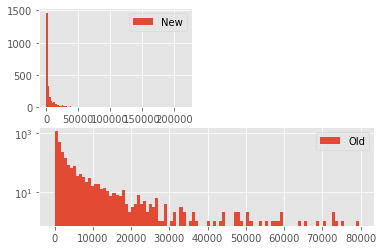

In [32]:
plt.subplot(221)
plt.hist(dfc.query("new_subscribers<230000").new_subscribers,bins=100, label='New');
plt.legend()
plt.subplot(212)
plt.hist(dfc.query("old_subscribers< 80000").old_subscribers,bins=100, label='Old');
plt.yscale('log')
plt.legend()
plt.show()

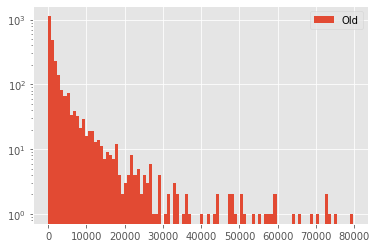

In [33]:
plt.hist(dfc.query("old_subscribers< 80000").old_subscribers,bins=100, label='Old');
plt.yscale('log')
plt.legend()
plt.show()

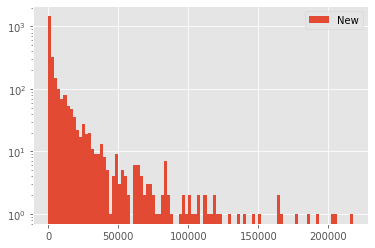

In [34]:
plt.hist(dfc.query("new_subscribers<230000").new_subscribers,bins=100, label='New');
plt.yscale('log')
plt.legend()
plt.show()

We can now see three distinct regions in the subscriber data:
1. Many courses have less than 2000 subscribers.
2. There is a middle region where a linear fit (to a log scale) might do a reasonable job of approximating the data.
3. Courses with more than 40,000 old subscribers probably belong with the best sellers.
4. Courses with more than 90,000 new subscribers probably belong with the best sellers.

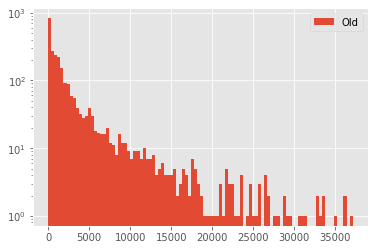

In [35]:
plt.hist(dfc.query("old_subscribers< 40000").old_subscribers,bins=100, label='Old');
plt.yscale('log')
plt.legend()
plt.show()

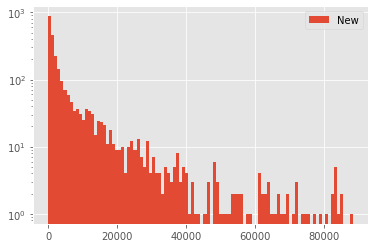

In [36]:
plt.hist(dfc.query("new_subscribers<90000").new_subscribers,bins=100, label='New');
plt.yscale('log')
plt.legend()
plt.show()

Looking for the Low thresholds based on courses with less than 1% of the total student enrollment


In [37]:
dfc[abs(dfc.cum_new_subsc-0.01)<0.0002].sort_values('new_subscribers')

course_id  ... old_cat
3649    1018530  ...       1
3269    1021594  ...       1
3048     641236  ...       1
3500     661780  ...       1
1818     271652  ...       1
1931     743634  ...       1
1799     643970  ...       1
1619     987865  ...       1
1729     502204  ...       1
2451      42255  ...       1
328      439362  ...       1
3627     599628  ...       1

[12 rows x 36 columns]

In [38]:
cum_new_subsc=np.cumsum(dfc.new_subscribers.sort_values()).reset_index(drop=True)/dfc.new_subscribers.sum()
cum_old_subsc=np.cumsum(dfc.old_subscribers.sort_values()).reset_index(drop=True)/dfc.old_subscribers.sum()

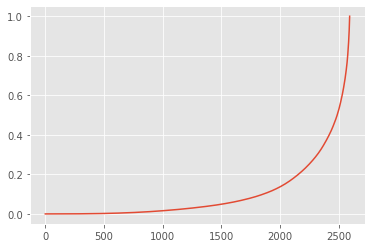

In [39]:
plt.plot(cum_new_subsc)

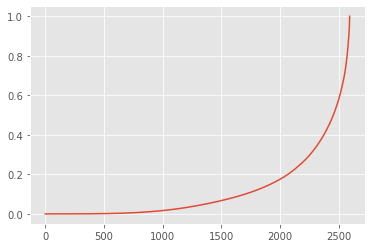

In [40]:
plt.plot(cum_old_subsc)

Tentative decision, set low threshold at 10% of all students in each data set  (1700 for old set, 1855 for new set)

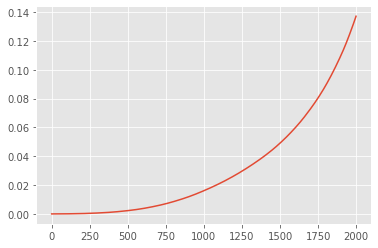

In [41]:
plt.plot(cum_new_subsc[:2000])

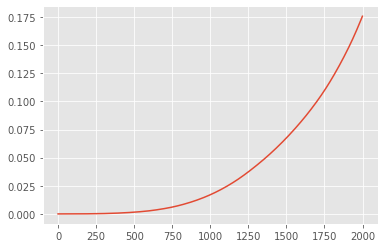

In [42]:
plt.plot(cum_old_subsc[:2000])

In [43]:
cum_new_subsc[1850:1860]

1850    0.099016
1851    0.099225
1852    0.099436
1853    0.099647
1854    0.099859
1855    0.100070
1856    0.100282
1857    0.100494
1858    0.100706
1859    0.100920
Name: new_subscribers, dtype: float64

In [50]:
cum_old_subsc[1700:1710]

1700    0.099939
1701    0.100126
1702    0.100314
1703    0.100502
1704    0.100691
1705    0.100879
1706    0.101068
1707    0.101257
1708    0.101447
1709    0.101636
Name: old_subscribers, dtype: float64

In [51]:
1700/2592

0.6558641975308642

In [53]:
1854/2592

0.7152777777777778

Questions:
What is the num_subscribers for the course at the threshold (for each data set)?

How do these threshold affect the results in terms of transitions between categories?

How do these thresholds correlate with cumulative revnues?



With the log scale removed, the area under the histogram might tells us something meaningful about the distribution of course sizes.  But we are not there yet ...

We know from the earlier log plot that there are more than 10 courses with at least 30,000 subscribers each that are drowned out by the vertical scale of this plot.

Let's take a closer look at the courses on the lower end of the subscriber numbers that are drowning out our real data.  There may be a large number of these courses but with their low attentance they represent only a small portion of the student population:

sum(old_subscribers<= 2000 ):  1413375
sum(old_subscribers    )=  11715835
Number of courses with old_subscribers<  20:  438
Number of courses with old_subscribers<= 2000 ):  2561
Number of courses                          : 3672


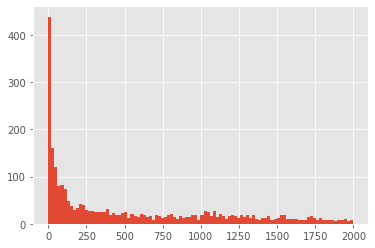

In [45]:
thr = 2000
print("sum(old_subscribers<=",thr,'): ', df.query("old_subscribers<"+str(thr)).old_subscribers.sum())
print("sum(old_subscribers    )= ",                                 df.old_subscribers.sum())
plt.hist(df.query("old_subscribers<@thr").old_subscribers,bins=100);
print("Number of courses with old_subscribers<  20: ",df.query("old_subscribers< 20").shape[0])
print("Number of courses with old_subscribers<=",thr,'): ',df.query("old_subscribers<"+str(thr)).shape[0])
print("Number of courses                          :",                              df.shape[0])


Let's plot the cumulative number of subscribers when we sort the data:

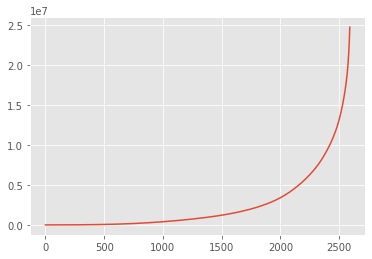

In [46]:
Sorted_subsc = dfc.new_subscribers.sort_values()
cum_subsc=np.cumsum(Sorted_subsc).reset_index(drop=True)
plt.plot(cum_subsc)

In [47]:
Sorted_subsc = df.num_subscribers.sort_values()
cum_subsc=np.cumsum(Sorted_subsc).reset_index(drop=True)
plt.plot(cum_subsc)

AttributeError: ignored

In [ ]:
dfc[dfc.old_subscribers>30000].count()

We see that the lower 3000 courses (about 80% of the courses) have fewer than 25% of the total subscribers.  Most of the subscribers are enrolled in the top 20% of courses (in terms of popularity) - which should not be surprising.  What it does tell us is that we need to be careful in applying statistical tools like averages and medians which are meaningless in this type of data.

In [ ]:
piv = (df.pivot_table(index='subject', columns='num_subscribers',values='course_id', aggfunc = 'count')).T
piv

In [ ]:
piv.plot(kind='bar',stacked=True)
plt.show()

In [ ]:
piv.hist(df.query("num_subscribers<100").num_subscribers,bins=100);